In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random

In [2]:
class GridWorld:
    """Grid world environment for Q-Learning"""

    def __init__(self, size=5):
        self.size = size
        self.start = (0, 0)
        self.goal = (size-1, size-1)
        self.obstacles = [(1, 1), (2, 2), (3, 1)]
        self.state = self.start

    def reset(self):
        """Reset environment to starting state"""
        self.state = self.start
        return self.state

In [3]:
def step(self, action):
    """Execute action and return next state, reward, done"""
    x, y = self.state

    # Actions: 0=up, 1=right, 2=down, 3=left
    if action == 0:  # up
        x = max(0, x - 1)
    elif action == 1:  # right
        y = min(self.size - 1, y + 1)
    elif action == 2:  # down
        x = min(self.size - 1, x + 1)
    elif action == 3:  # left
        y = max(0, y - 1)

    next_state = (x, y)

    # Check if hit obstacle
    if next_state in self.obstacles:
        next_state = self.state  # Stay in place
        reward = -10
    elif next_state == self.goal:
        reward = 100
    else:
        reward = -1  # Small penalty for each step

    self.state = next_state
    done = (next_state == self.goal)

    return next_state, reward, done

# Add this method to GridWorld class
GridWorld.step = step

In [4]:
def render(self, q_table=None, policy=None):
    """Visualize the grid world"""
    grid = np.zeros((self.size, self.size))

    # Mark obstacles
    for obs in self.obstacles:
        grid[obs] = -1

    # Mark goal
    grid[self.goal] = 2

    # Mark current position
    grid[self.state] = 1

    plt.figure(figsize=(8, 8))

    # Create color map
    cmap = colors.ListedColormap(['white', 'blue', 'green', 'red'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(grid, cmap=cmap, norm=norm)

    # Add grid lines
    for i in range(self.size + 1):
        plt.axhline(i - 0.5, color='black', linewidth=1)
        plt.axvline(i - 0.5, color='black', linewidth=1)

    # Add arrows for policy if provided
    if policy is not None:
        arrow_dict = {0: '↑', 1: '→', 2: '↓', 3: '←'}
        for i in range(self.size):
            for j in range(self.size):
                if (i, j) not in self.obstacles and (i, j) != self.goal:
                    action = policy[i, j]
                    plt.text(j, i, arrow_dict[action],
                           ha='center', va='center',
                           fontsize=20, color='red')

    plt.title('Grid World')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

# Add this method to GridWorld class
GridWorld.render = render

In [5]:
class QLearningAgent:
    """Q-Learning Agent"""

    def __init__(self, state_space, action_space, learning_rate=0.1,
                 discount_factor=0.95, epsilon=1.0, epsilon_decay=0.995,
                 epsilon_min=0.01):
        self.state_space = state_space
        self.action_space = action_space
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        # Initialize Q-table with zeros
        self.q_table = np.zeros((*state_space, action_space))

In [6]:
def get_action(self, state, training=True):
    """Select action using epsilon-greedy policy"""
    if training and random.random() < self.epsilon:
        return random.randint(0, self.action_space - 1)  # Explore
    else:
        return np.argmax(self.q_table[state])  # Exploit

# Add this method to QLearningAgent class
QLearningAgent.get_action = get_action

In [8]:
def update(self, state, action, reward, next_state, done):
    """Update Q-table using Q-Learning update rule"""
    current_q = self.q_table[state][action]

    if done:
        target_q = reward
    else:
        max_next_q = np.max(self.q_table[next_state])
        target_q = reward + self.gamma * max_next_q

    # Q-Learning update
    self.q_table[state][action] = current_q + self.lr * (target_q - current_q)

# Add this method to QLearningAgent class
QLearningAgent.update = update

In [9]:
def decay_epsilon(self):
    """Decay exploration rate"""
    self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

def get_policy(self):
    """Extract greedy policy from Q-table"""
    return np.argmax(self.q_table, axis=2)

# Add these methods to QLearningAgent class
QLearningAgent.decay_epsilon = decay_epsilon
QLearningAgent.get_policy = get_policy

In [10]:
def train_q_learning(env, agent, episodes=1000, max_steps=100):
    """Train Q-Learning agent"""
    rewards_per_episode = []
    steps_per_episode = []

    print("Training Q-Learning Agent...")
    print(f"Episodes: {episodes}")
    print("-" * 50)

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        steps = 0

        for step in range(max_steps):
            action = agent.get_action(state)
            next_state, reward, done = env.step(action)

            agent.update(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward
            steps += 1

            if done:
                break

        agent.decay_epsilon()
        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)

        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            avg_steps = np.mean(steps_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes} - "
                  f"Avg Reward: {avg_reward:.2f} - "
                  f"Avg Steps: {avg_steps:.2f} - "
                  f"Epsilon: {agent.epsilon:.3f}")

    print("-" * 50)
    print("Training Complete!")

    return rewards_per_episode, steps_per_episode

In [11]:
def plot_training_progress(rewards, steps):
    """Plot training metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot rewards
    window = 50
    avg_rewards = np.convolve(rewards, np.ones(window)/window, mode='valid')
    ax1.plot(rewards, alpha=0.3, label='Episode Reward')
    ax1.plot(range(window-1, len(rewards)), avg_rewards,
             label=f'{window}-Episode Moving Average', linewidth=2)
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Total Reward')
    ax1.set_title('Training Rewards')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot steps
    avg_steps = np.convolve(steps, np.ones(window)/window, mode='valid')
    ax2.plot(steps, alpha=0.3, label='Episode Steps')
    ax2.plot(range(window-1, len(steps)), avg_steps,
             label=f'{window}-Episode Moving Average', linewidth=2)
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps to Goal')
    ax2.set_title('Training Efficiency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [12]:
def test_agent(env, agent, num_episodes=5):
    """Test trained agent"""
    print("\nTesting Trained Agent...")
    print("-" * 50)

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        path = [state]

        for _ in range(50):
            action = agent.get_action(state, training=False)
            next_state, reward, done = env.step(action)

            path.append(next_state)
            total_reward += reward
            steps += 1
            state = next_state

            if done:
                break

        print(f"Test Episode {episode + 1}: "
              f"Steps: {steps}, "
              f"Total Reward: {total_reward:.2f}")
        print(f"Path: {' -> '.join([str(p) for p in path])}")

    print("-" * 50)

In [13]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Create environment
env = GridWorld(size=5)

# Create agent
agent = QLearningAgent(
    state_space=(env.size, env.size),
    action_space=4,
    learning_rate=0.1,
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01
)

In [14]:
# Train agent
rewards, steps = train_q_learning(env, agent, episodes=1000, max_steps=100)

Training Q-Learning Agent...
Episodes: 1000
--------------------------------------------------
Episode 100/1000 - Avg Reward: 12.18 - Avg Steps: 39.73 - Epsilon: 0.606
Episode 200/1000 - Avg Reward: 79.32 - Avg Steps: 16.55 - Epsilon: 0.367
Episode 300/1000 - Avg Reward: 89.62 - Avg Steps: 10.84 - Epsilon: 0.222
Episode 400/1000 - Avg Reward: 90.47 - Avg Steps: 9.63 - Epsilon: 0.135
Episode 500/1000 - Avg Reward: 91.62 - Avg Steps: 9.11 - Epsilon: 0.082
Episode 600/1000 - Avg Reward: 92.11 - Avg Steps: 8.62 - Epsilon: 0.049
Episode 700/1000 - Avg Reward: 92.62 - Avg Steps: 8.38 - Epsilon: 0.030
Episode 800/1000 - Avg Reward: 92.69 - Avg Steps: 8.13 - Epsilon: 0.018
Episode 900/1000 - Avg Reward: 92.96 - Avg Steps: 8.04 - Epsilon: 0.011
Episode 1000/1000 - Avg Reward: 92.88 - Avg Steps: 8.12 - Epsilon: 0.010
--------------------------------------------------
Training Complete!


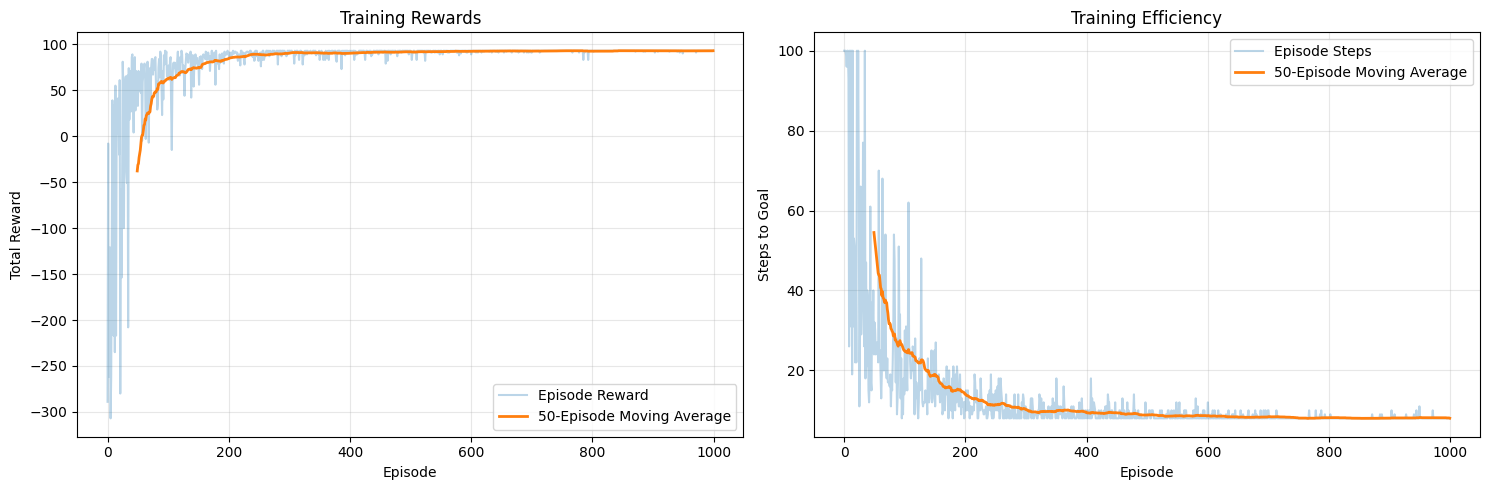

In [15]:
# Plot training progress
plot_training_progress(rewards, steps)

In [16]:
# Test trained agent
test_agent(env, agent, num_episodes=5)


Testing Trained Agent...
--------------------------------------------------
Test Episode 1: Steps: 8, Total Reward: 93.00
Path: (0, 0) -> (0, 1) -> (0, 2) -> (0, 3) -> (0, 4) -> (1, 4) -> (2, 4) -> (3, 4) -> (4, 4)
Test Episode 2: Steps: 8, Total Reward: 93.00
Path: (0, 0) -> (0, 1) -> (0, 2) -> (0, 3) -> (0, 4) -> (1, 4) -> (2, 4) -> (3, 4) -> (4, 4)
Test Episode 3: Steps: 8, Total Reward: 93.00
Path: (0, 0) -> (0, 1) -> (0, 2) -> (0, 3) -> (0, 4) -> (1, 4) -> (2, 4) -> (3, 4) -> (4, 4)
Test Episode 4: Steps: 8, Total Reward: 93.00
Path: (0, 0) -> (0, 1) -> (0, 2) -> (0, 3) -> (0, 4) -> (1, 4) -> (2, 4) -> (3, 4) -> (4, 4)
Test Episode 5: Steps: 8, Total Reward: 93.00
Path: (0, 0) -> (0, 1) -> (0, 2) -> (0, 3) -> (0, 4) -> (1, 4) -> (2, 4) -> (3, 4) -> (4, 4)
--------------------------------------------------


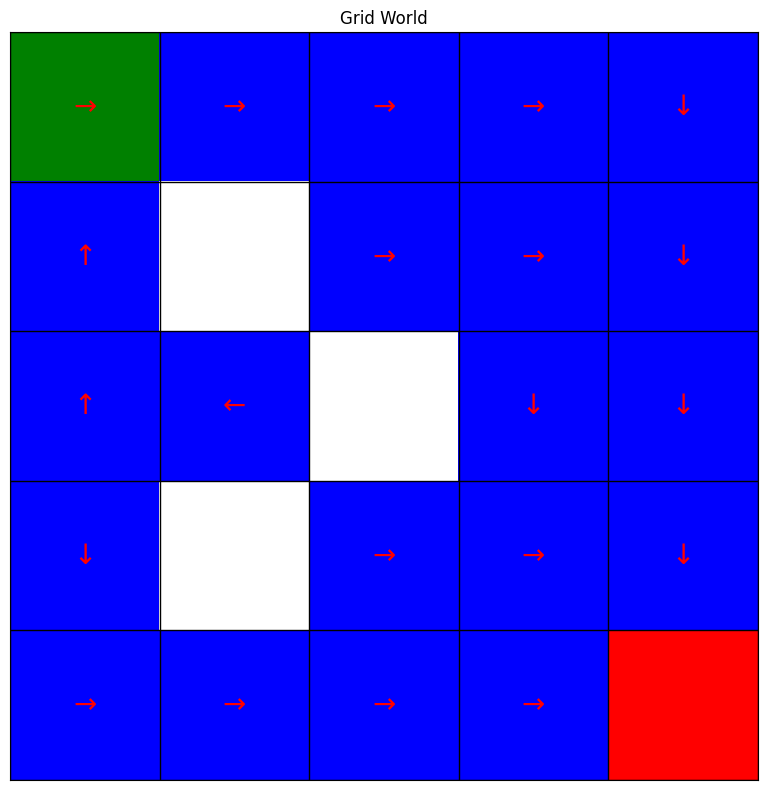

In [17]:
# Visualize learned policy
policy = agent.get_policy()
env.reset()
env.render(policy=policy)